In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, classification_report
import xgboost as xgb

In [2]:
df=pd.read_csv('loan_train.csv')

In [3]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [4]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
# scaling the numerical columns
scaler = StandardScaler()
numerical_cols = ['LoanAmount', 'Total_Income', 'Debt_to_Income_Ratio']
X_train1[numerical_cols] = scaler.fit_transform(X_train1[numerical_cols])
X_test1[numerical_cols] = scaler.transform(X_test1[numerical_cols])

Accuracy: 0.7642276422764228
Confusion Matrix:
 [[26 17]
 [12 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.60      0.64        43
           1       0.80      0.85      0.82        80

    accuracy                           0.76       123
   macro avg       0.74      0.73      0.73       123
weighted avg       0.76      0.76      0.76       123



C:\Users\hplap\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [06:17:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


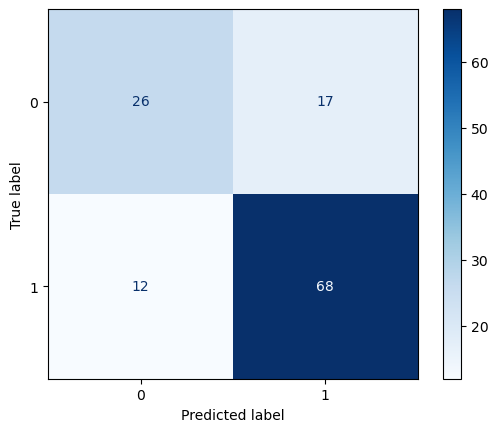

In [8]:
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic", 
    eval_metric="logloss",        
    use_label_encoder=False       
)

# training the model
xgb_model.fit(X_train1,y_train1)
# Make predictions
y_pred1= xgb_model.predict(X_test1)

# Evaluate the model
accuracy1 = accuracy_score(y_test1, y_pred1)
conf_matrix1 = confusion_matrix(y_test1, y_pred1)
classification_rep1 = classification_report(y_test1, y_pred1)

print("Accuracy:", accuracy1)
print("Confusion Matrix:\n", conf_matrix1)
print("Classification Report:\n", classification_rep1)

# Display the confusion matrix with custom labels
disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix1)
disp1.plot(cmap="Blues")

# Hyperparameter tunning 

In [10]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train1, y_train1)

# Print best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1.0}
Best Cross-Validation Accuracy: 0.8349412492269636


C:\Users\hplap\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [06:22:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on Test Data: 0.7967479674796748

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.53      0.65        43
           1       0.79      0.94      0.86        80

    accuracy                           0.80       123
   macro avg       0.81      0.74      0.75       123
weighted avg       0.80      0.80      0.78       123


Confusion Matrix:
 [[23 20]
 [ 5 75]]
Accuracy: 0.7967479674796748
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.53      0.65        43
           1       0.79      0.94      0.86        80

    accuracy                           0.80       123
   macro avg       0.81      0.74      0.75       123
weighted avg       0.80      0.80      0.78       123



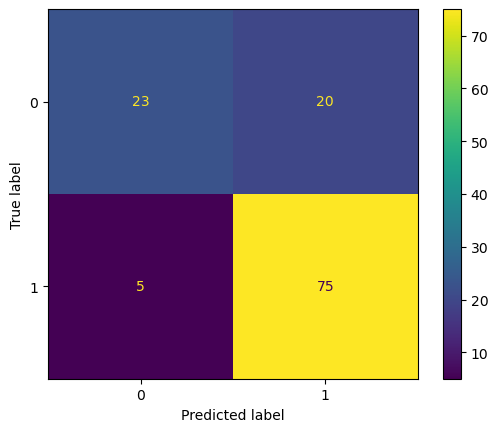

In [14]:
# Initialize XGBoost with the best parameters
best_xgb = XGBClassifier(
    colsample_bytree=0.8,
    gamma=1,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    n_estimators=50,
    subsample=1.0,
    random_state=42
)

# Train the model
best_xgb.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred = best_xgb.predict(X_test1)

# Evaluate the model
print("Accuracy on Test Data:", accuracy_score(y_test1, y_pred))
print("\nClassification Report:\n", classification_report(y_test1, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test1, y_pred))

print("Accuracy:", accuracy_score(y_test1, y_pred))
print("Classification Report:\n", classification_report(y_test1, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test1, y_pred)).plot()